# Decision Tree

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns #visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors

In [4]:
data=pd.read_csv('/Users/deepyuan/Desktop/data_kaggle/insurance.csv')
data.head() #check the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

Text(0,0.5,'number')

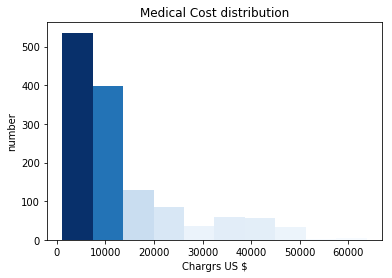

In [6]:
N, bins, patches = plt.hist(data.charges)
fracs = N / N.max()

norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.Blues(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('Medical Cost distribution')
plt.xlabel('Chargrs US $')
plt.ylabel('number')

In [7]:
print('Medical cost description :')
print(data.charges.agg(['min','mean','max']))
print('quantile(25%)',data.charges.quantile(0.25))
print('quantile(50%)',data.charges.quantile(0.50))
print('quantile(75%)',data.charges.quantile(0.75))

Medical cost description :
min      1121.873900
mean    13270.422265
max     63770.428010
Name: charges, dtype: float64
quantile(25%) 4740.28715
quantile(50%) 9382.033
quantile(75%) 16639.912515


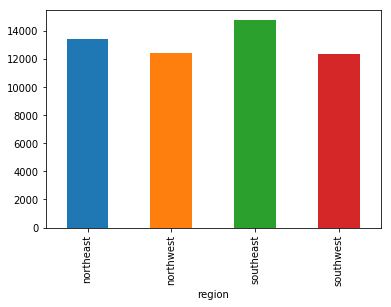

In [8]:
data_region=data.groupby('region').charges.mean()
data_region.plot(kind='bar')

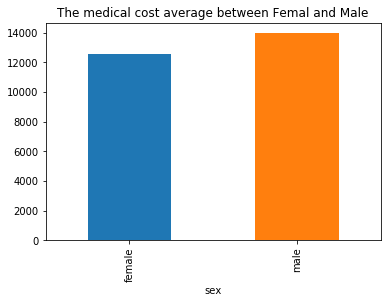

In [9]:
data_sex=data.groupby('sex').charges.mean()
data_sex.plot(kind='bar',title='The medical cost average between Femal and Male')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116d83160>],
      dtype=object)

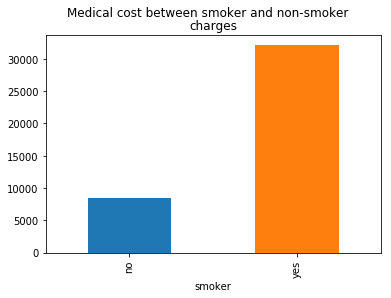

In [10]:
data_smoker=data.groupby('smoker').charges.mean()
data_smoker.plot(kind='bar',subplots=True, title='Medical cost between smoker and non-smoker')

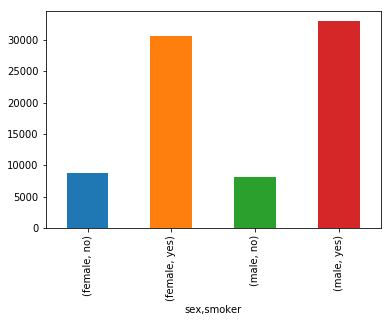

In [11]:
data_sex_smoker=data.groupby(['sex','smoker']).charges.mean()
data_sex_smoker.plot(kind='bar')

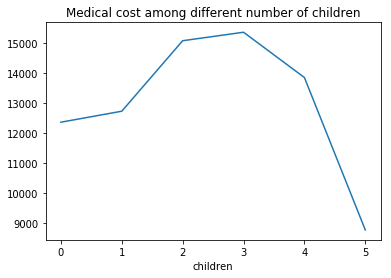

In [12]:
data_children=data.groupby('children').charges.mean()
data_children.plot(kind='line', title='Medical cost among different number of children')

In [13]:
d={'age' : (data.age),'bmi':(data.bmi),'charges':(data.charges)}
var_cont=pd.DataFrame(data=d)

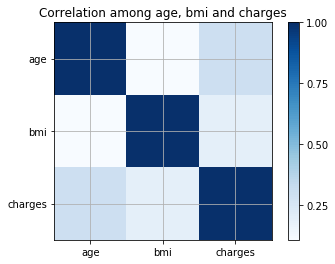

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a36bcf8>,
      dtype=object)

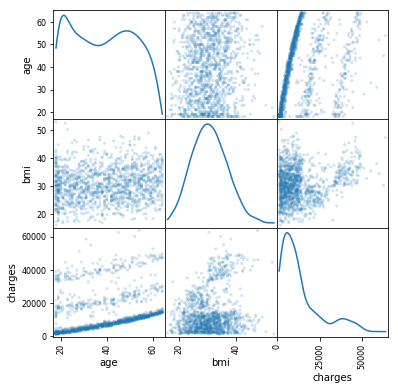

In [14]:
from matplotlib import cm as cm
from pandas.plotting import scatter_matrix


def correlation_matrix(var_cont):
    
 fig = plt.figure()
 ax1 = fig.add_subplot(111)
 ax1.grid(True)
 cmap = cm.get_cmap('Blues', 100)
 cax = ax1.imshow(var_cont.corr(), interpolation="nearest", cmap=cmap)
 labels=['age','bmi','charges']
 plt.xticks(range(len(var_cont.columns)),labels)
 plt.yticks(range(len(var_cont.columns)) ,labels)
 plt.title('Correlation among age, bmi and charges')
 fig.colorbar(cax,ticks=[.25,.50,.75,1])
 plt.show()

correlation_matrix(var_cont)
scatter_matrix(var_cont,alpha=0.2, figsize=(6, 6), diagonal='kde')


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lb_make=LabelEncoder()
data['sex_code']=lb_make.fit_transform(data['sex'])
data[['sex','sex_code']].head()
data['smoker_code']=lb_make.fit_transform(data['smoker'])
data['region_code']=lb_make.fit_transform(data['region'])
data[['region','region_code']].head()
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [17]:
def charges_to_category(y):
    if y<=4740:      # lower 25%
        return 'level 1'
    if 4740<=y<9382:  #25%-50%
        return 'level 2'
    if 9382<=y<16639:  #50%-75%
        return 'level 3'
    if y>=16639:    # above 75%
        return 'level 4'

data['charges_level']=data['charges'].apply(charges_to_category)
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,region_code,charges_level
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3,level 4
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2,level 1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2,level 1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,level 4
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,level 1


In [18]:
x=data.iloc[:, [0,2,3,7,8,9]]
y=data.iloc[:,10]
print (x.head())

   age     bmi  children  sex_code  smoker_code  region_code
0   19  27.900         0         0            1            3
1   18  33.770         1         1            0            2
2   28  33.000         3         1            0            2
3   33  22.705         0         1            0            1
4   32  28.880         0         1            0            1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size= 0.3, random_state=1)
print ("Train independent variables:" ,x_train.shape)
print ("Train dependent variable::" , y_train.shape)
print("Test independent variables:", x_test.shape)
print("Test dependent variables:", y_test.shape)

Train independent variables: (936, 6)
Train dependent variable:: (936,)
Test independent variables: (402, 6)
Test dependent variables: (402,)


In [21]:
clf_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

In [22]:
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
data_feature_names=['age','bmi','children','sex','smoker','region']

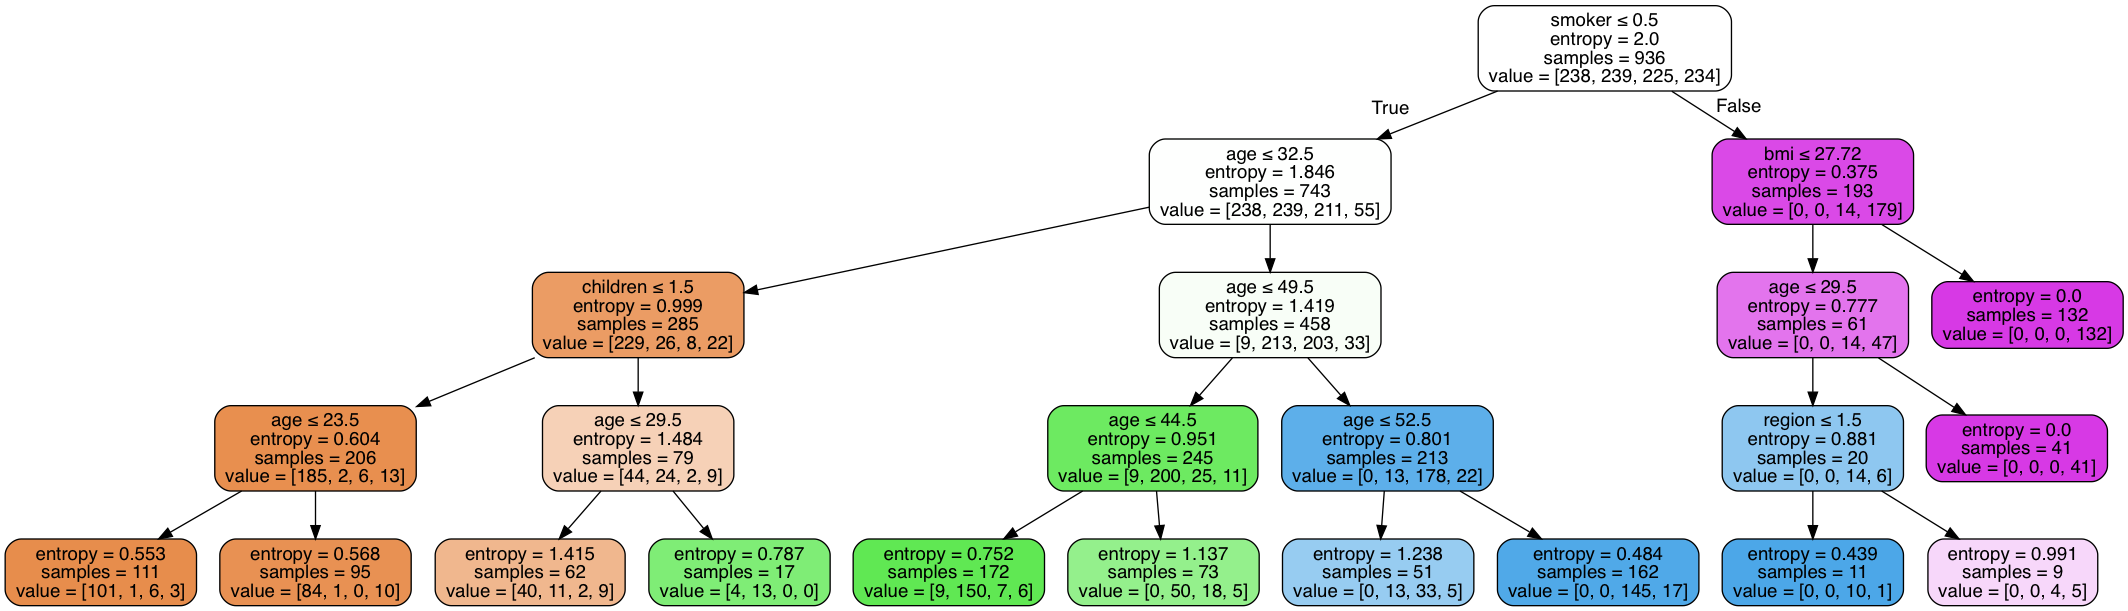

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data, feature_names=data_feature_names, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
y_prediction=clf_entropy.predict(x_test)

In [26]:
# Test single value
test=data.iloc[460,[0,2,3,7,8,9]]
test=np.array(test).reshape(1,-1)
#y_prediction(test)
print('Predicted:',clf_entropy.predict(test))
print('True:',data.iloc[460,[10]])

Predicted: ['level 2']
True: charges_level    level 3
Name: 460, dtype: object


In [27]:
print("Accuracy is :", accuracy_score(y_test, y_prediction)*100)

Accuracy is : 87.06467661691542


# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression(normalize=True)

In [29]:
x_lr=data.iloc[:, [0,2,3,7,8,9]]
y_lr=data.iloc[:,6]

In [30]:
x_lr_train, x_lr_test, y_lr_train, y_lr_test=train_test_split(x_lr,y_lr,test_size= 0.3, random_state=1)

In [31]:
lr_model=lr.fit(x_lr_train,y_lr_train)

In [32]:
y_lr_pred=lr_model.predict(x_lr_test)

In [33]:
r2_score(y_lr_test, y_lr_pred)

0.7403677168975319

In [37]:
print('Linear Regression intercept:', lr_model.intercept_)
print('Linear Regression Coefficients:',lr_model.coef_)

Linear Regression intercept: -10936.556437496145
Linear Regression Coefficients: [  252.15440619   316.514758     351.46251009  -281.16765835
 24044.37169738  -318.49464584]
